# Laboratorio 3 #

In [ ]:
# En primer lugar se comienza cargando las librerías y el dataset #

In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = "/Users/GUILLERMO/Desktop/U/Noveno Semestre/MLE/Laboratorios/Laboratorio 03/satgpa.csv"
sat_gpa = pd.read_csv(dataset)

In [ ]:
# Ahora buscamos observar cómo están las tablas y cómo son los datos que se nos presentan #

In [27]:
print(sat_gpa.describe())
sat_gpa.head(10)

               sex      sat_sum       hs_gpa       fy_gpa
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.516000   103.329000     3.198100     2.467950
std       0.499994    14.287368     0.541647     0.740805
min       0.000000    53.000000     1.800000     0.000000
25%       0.000000    93.000000     2.800000     1.980000
50%       1.000000   103.000000     3.200000     2.465000
75%       1.000000   113.000000     3.700000     3.020000
max       1.000000   144.000000     4.500000     4.000000


,sex,sat_sum,hs_gpa,fy_gpa
0,1,127,3.40,3.18
1,0,122,4.00,3.33
2,0,116,3.75,3.25
3,1,95,3.75,2.42
4,1,107,4.00,2.63
5,0,111,4.00,2.91
6,1,122,2.80,2.83
7,1,115,3.80,2.51
8,0,144,4.00,3.82
9,1,85,2.60,2.54


In [8]:
print(sat_gpa.isna().sum())
print(sat_gpa.dtypes)

sex        0
sat_v      0
sat_m      0
sat_sum    0
hs_gpa     0
fy_gpa     0
dtype: int64
sex          int64
sat_v        int64
sat_m        int64
sat_sum      int64
hs_gpa     float64
fy_gpa     float64
dtype: object


In [ ]:
# Al observar que no hay problemas de datos fatantes y que los datos se encuentran buenos a grosso modo, se puede continuar con arreglar los datos y las tablas para su mayor facilidad de trabajo. Se eliminarán las tablas de la nota verbal y matemática ya que no se necesitan para el análisis #

In [9]:
sat_gpa['sex'].value_counts()

1    516
2    484
Name: sex, dtype: int64

In [10]:
sat_gpa['sex'] = sat_gpa['sex'].replace(2, 0)
sat_gpa = sat_gpa.drop(columns=["sat_v", "sat_m"])

In [11]:
sat_gpa['sex'].value_counts()

1    516
0    484
Name: sex, dtype: int64

In [14]:
sat_gpa.head(5)

,sex,sat_sum,hs_gpa,fy_gpa
0,1,127,3.40,3.18
1,0,122,4.00,3.33
2,0,116,3.75,3.25
3,1,95,3.75,2.42
4,1,107,4.00,2.63


In [ ]:
# Paso siguiente se grafican los datos para buscar encontrar cómo se distribuyen los datos que serán usados en el modelo #

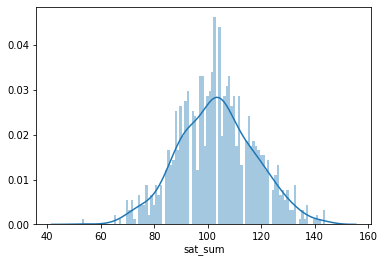

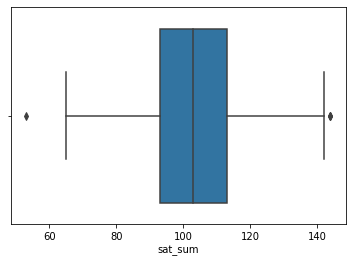

In [28]:
dist_sat = sns.distplot(sat_gpa['sat_sum'], bins = 100)
plt.figure()
sns.boxplot(x = sat_gpa['sat_sum'])

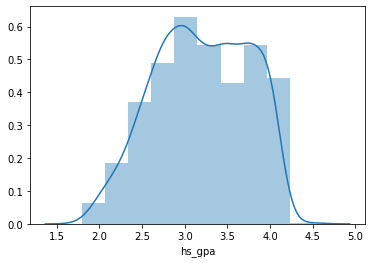

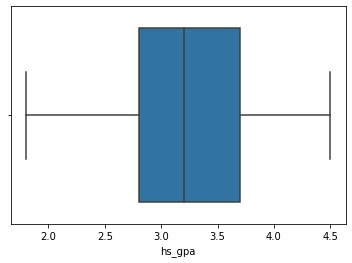

In [22]:
dist_hs_gpa = sns.distplot(sat_gpa['hs_gpa'], bins = 10)
plt.figure()
sns.boxplot(x = sat_gpa['hs_gpa'])

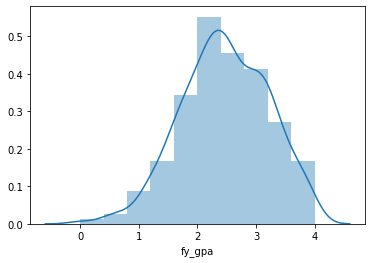

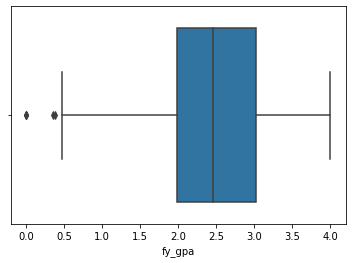

In [24]:
dist_fy_gpa = sns.distplot(sat_gpa['fy_gpa'], bins = 10)
plt.figure()
sns.boxplot(x = sat_gpa['fy_gpa'])

In [ ]:
# Finalmente comenzamos a usar los modelos encontrados en clase. #

In [ ]:
# Comenzamos el proceso arreglando los valores de "x" y "x". #

In [30]:
y = sat_gpa[['fy_gpa']].to_numpy()
X = sat_gpa[["sex", "sat_sum", "hs_gpa"]].to_numpy()

In [47]:
y

array([[3.18],
       [3.33],
       [3.25],
       [2.42],
       [2.63],
       [2.91],
       [2.83],
       [2.51],
       [3.82],
       [2.54],
       [3.38],
       [3.02],
       [2.6 ],
       [3.81],
       [3.02],
       [3.48],
       [2.15],
       [3.8 ],
       [3.13],
       [3.4 ],
       [3.59],
       [1.62],
       [3.61],
       [2.54],
       [2.51],
       [0.  ],
       [3.72],
       [0.87],
       [2.79],
       [2.  ],
       [3.69],
       [3.48],
       [2.49],
       [3.92],
       [3.05],
       [2.4 ],
       [2.71],
       [1.58],
       [1.38],
       [2.52],
       [2.16],
       [2.57],
       [2.64],
       [2.47],
       [1.  ],
       [2.73],
       [2.42],
       [2.3 ],
       [3.33],
       [2.37],
       [2.11],
       [2.91],
       [3.29],
       [2.67],
       [2.78],
       [3.13],
       [2.94],
       [4.  ],
       [2.9 ],
       [2.92],
       [1.91],
       [3.11],
       [2.02],
       [2.51],
       [3.51],
       [3.24],
       [2.

In [ ]:
# Ahora implementamos las funciones aprendidas en clase. #

In [35]:
def costo_lineal(X, y, theta):
    h = X @ theta
    return((y-h)**2).sum()/(2*len(X))

def costo_lineal_gradiente(X, y, theta):
    h = X @ theta
    return(X.T @ (h-y))/len(X)

In [41]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)

In [66]:
def grad_desc(
    X, y, theta_0, costo_lineal, costo_lineal_gradiente,
    learning_rate = 0.00001, threshold = 0.001, max_iter = 10000):
    
    thetas = theta_0
    iteration = 0
    costs = []

    while np.linalg.norm(costo_lineal_gradiente(X, y, thetas)) > threshold and iteration < max_iter:
        iteration += 1
        thetas = thetas - (learning_rate * costo_lineal_gradiente(X, y, thetas))

        costs.append(costo_lineal(X, y, thetas))

        return thetas, costs
thetas, costs = grad_desc(X, y, theta_0, costo_lineal, costo_lineal_gradiente)

In [ ]:
# Finalmente evaluamos los valores que el modelo nos devuelve. #

In [52]:
thetas

array([[0.82934556],
       [0.75638949],
       [0.44576303]])

In [67]:
costs

[3063.278925594278]

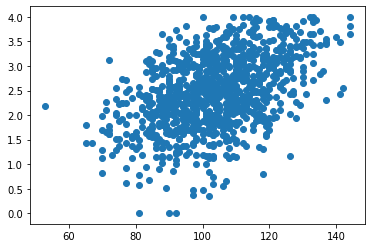

In [68]:
plt.scatter(X[:, 1], y)